In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
PS4C_dir = Path('/home/zequnl/Projects/PS4C/model/lagache/')

In [2]:
freqs = ['20', '125', '350', '850' ]

## Load Lagache model

In [3]:
lagache_counts = [
    np.genfromtxt(PS4C_dir / f'ns{freq}_radio.dat', 
                  names=('S', 'dNdS'))  
    for freq in freqs]

## Load in websky hdf5 catalogs

In [4]:
import h5py

count_FRI = {}
count_FRII = {}
normed_counts = {}

for freq in freqs:
    print(freq)
    with h5py.File(f'/media/science/websky/radio/catalog_{freq}.h5', 'r') as f:
        bins = np.arange(-4.1, 2.5, 0.2)
        hist_I, bin_edges = np.histogram(np.log10(f['flux_I']), bins=bins)
        hist_II, bin_edges = np.histogram(np.log10(f['flux_II']), bins=bins)
        mids = (bin_edges[1:] + bin_edges[:-1])/2
        
        count_FRI[freq] = hist_I
        count_FRII[freq] = hist_II
        
        normed_count = (hist_I+hist_II) * (10**mids)**2.5 / np.diff(10**bin_edges) / (4 * np.pi)
        normed_counts[freq] = normed_count

20
125
350
850


In [5]:
def plot_freq(index):
    freq = freqs[index]
    S = lagache_counts[index]['S']
    dN = lagache_counts[index]['dNdS']
    
    plt.scatter(10**mids, normed_counts[freq] )
    
    plt.plot(S, dN * S**(5/2), '-', 
             color=f'C{index}',
             label=freq)

Text(0.5, 0, 'S [Jy]')

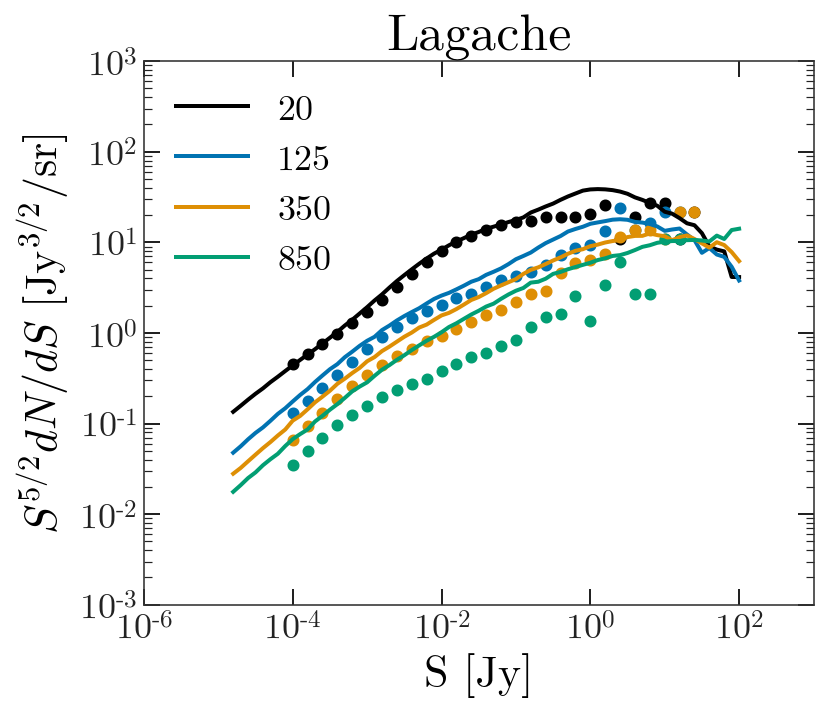

In [8]:
plt.figure(figsize=(6,5))

for i, freq in enumerate(freqs):
    plot_freq(i)
    
plt.title('Lagache')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3, 1e3)
plt.xlim(1e-6, 1e3)
plt.legend()
plt.ylabel('$S^{5/2} dN/dS$ [Jy$^{3/2}$/sr]')
plt.xlabel('S [Jy]')